<a href="https://colab.research.google.com/github/miles-garcia/DSPS_MGarcia/blob/main/DSPS_HW4_MGarcia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prepared by federica b bianco @fedhere
for UDel DSPS PHYS 461/661

# testing the "significance" of Dark Matter

In [2]:
...

#package I will use for constants and units conversion
import astropy
from astropy.constants import G

#package used to display latex formuale
from IPython.display import Latex
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR) we expect that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v\propto\frac{1}/{r}$

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)




$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2}
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 +
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 +
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework:
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass of (the center for simplicity) the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v^2 = \frac{G \cdot m(r)}{r}$


Derive this $v\propto\frac{1}{r}$ from Newron's law $F~=~\frac{GMm}{r^2}$. Write each formula and describe each step. You can use latex (you really just need to know ```\frac{}``` and ```^```) and this reference
https://www.physicsclassroom.com/calcpad/circgrav

Start with the fact that gravitational force = centripetal force for circular motion (which we'll assume here)

$F_g$ = $F_c$

$F_g$ = GMm/$r^2$

$F_c$ = m$v^2$/r

Since we're outside of the galaxy here, all the galaxy mass, M, is responsible for the gravitational force.

Simple algebra gives:
GMm/$r^2$ = m$v^2$/r

GM/$r^2$ = $v^2$/r

GM/r = $v^2$

$v$ = $\sqrt{\frac{GM}{r}}$

G and M are constants, so $v\propto\frac{1}{r}$.


## M31 rotational curve

### data ingestion
( I store the original paper as a link on another computer now I have to find it again :-( - sorry I will updat the reference )

Get the data from the github repository https://github.com/fedhere/DSPS/tree/master/HW4 : there are 2 files: mw.csv and m31.csv. Start with M31, the Andromeda galaxy, Vera Rubin's original target.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty is the propagation of the uncertainty in the location of the HII line. The uncertainty called ```err``` if the full error budget:  including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [3]:
m31 = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW4/m31.csv',header=[1])

In [4]:

m31 = m31.rename(columns={"#R(kpc":"R(kpc)","St.dev.":"dv","St.error":"err"}) #make the columns readable and easy to type
m31.head()

,R(kpc),V(km/s),dv,err
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


# exploratory data analysis
proceed with at least a few basic exploratory tasks

In [5]:
m31.shape

(55, 4)

In [6]:
m31.describe()

,R(kpc),V(km/s),dv,err
count,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855
std,415.523904,42.799892,49.254792,14.876951
min,0.100000,121.974000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000
50%,13.737000,229.124000,30.697000,12.065000
75%,161.675000,244.102500,99.980000,23.641000
max,1887.071000,414.942000,147.835000,54.110000


from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size
   


In [7]:
apparentSizeM31 = 3.167 #deg (looked up on wikipedia)


In [8]:
# note : by PEP8 standards the import should be at the top, I leave it here for hyou to see that I am using astropy.units now
from astropy import units as u
m31angS = apparentSizeM31 * u.degree #start in degrees
print("Angular Size of the visible component of Andromeda: {:.2f}".format(m31angS.to(u.rad)  )) #make the conversion

Angular Size of the visible component of Andromeda: 0.06 rad


Please make sure you print a sensible number of decimal digits! you have a  number of significant digits set by the number of digit in the info you get from wikipedia

The distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc

In [9]:
d_and = 2.54e6*u.lightyear #this was the unit that had uncertainties so start in ly and convert to kpc
u_and = 0.11*u.lightyear

m31Size = d_and.to(u.kpc)*m31angS.to(u.rad)/u.rad #multiply by angle (small angle approx), I divided by u.rad so that the result is in kpc as radians are really sin(radians) and have no unit here
m31SizeError = u_and.to(u.kpc)*m31angS.to(u.rad)/u.rad

In [10]:
...
print("Size of the visible component of Andromeda: " +
      r"{:.0f} +/- {:2.1f}".format(m31Size, m31SizeError))#, m31SizeError


Size of the visible component of Andromeda: 43 kpc +/- 0.0 kpc


Print the distance like I printed the angular size.

To get the physical size of the visible component of andtomeda you can use simple trigonometry: $y = r * sin(\alpha) ~ \sim ~ r \alpha $ for small angles


Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc).


### find the first measurement  in your data table that includes all the luminous mass.

What is the smallest radius in your data where the luminous mass is completely included and what is the veolcity at that radius?
You can do it by broadcasting (see homework 3)

In [83]:
tt = []
for i in range(len(m31["R(kpc)"])):
  if m31["R(kpc)"][i]<43/2: #take only things bigger than the actual value
    tt.append(False)
  else:
    tt.append(True)


m31tt = m31[tt] #broadcasted result
m31tt

,R(kpc),V(km/s),dv,err
30,23.738,236.511,11.729,1.580
31,28.485,232.335,16.577,2.106
32,34.182,233.530,27.353,3.826
33,41.019,230.444,52.432,9.815
34,49.222,237.069,109.381,23.924
35,59.067,249.443,134.552,26.447
36,70.880,218.489,132.355,24.657
37,85.056,206.603,135.003,27.258
38,102.068,213.002,132.456,29.321
39,122.481,197.383,105.727,23.358


So entry 30 is the first entry with R > 43 kpc.

In [84]:
m31["V(km/s)"].iloc[30]
#This is the velocity in km/s for the first data point at r>43kpc


236.511

We expect the velocity to decrease as 1/sqrt(r) if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor sqrt(2) slower, three times as far a factor sqrt(3) slower.

write a function that

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy,

2. takes as arguments:
    - the data and
    - N
    - the size of the luminous component of the galaxy

2. Returns the value of the radius and its uncertainty and the velocity and its uncertainty

In [11]:
# first measurement including all mass
def getradii(data,N,r_galaxy):
  threshold = N*r_galaxy #threshold in galaxy radii
  truth = []
  for i in range(len(data["R(kpc)"])): #this is just the same thing I already did for a variable radius
    if data["R(kpc)"][i]<threshold:
      truth.append(False)
    else:
      truth.append(True)
  data_new = data[truth]
  rad = data_new.iloc[0][0] #grab all the information from the data at that distance
  vel = data_new.iloc[0][1]
  vel_dv = data_new.iloc[0][2]
  vel_err = data_new.iloc[0][3]
  return(rad,vel,vel_dv,vel_err) #return it.




### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line)

2. each velocity as an errorbar with error equal to err in the same color as the line in 1

3. each velocity as an errorbar with error equal to dv in  the same color but a different line thickness


4. the datapoint corresponding to N=1, 2, 3 each in a different color.

5. add a legend that indicates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()```)

7. limit the x axis to the "relevant" portion of the data

In [12]:
r1,v1,dv1,e1 = getradii(m31,1,43/2) #get the info for all 3 radii that we're gonna use
r2,v2,dv2,e2 = getradii(m31,2,43/2)
r3,v3,dv3,e3 = getradii(m31,3,43/2)

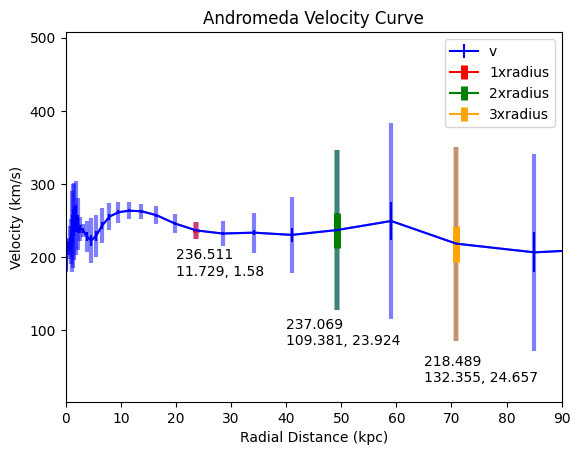

In [13]:
plt.errorbar(m31["R(kpc)"],m31["V(km/s)"],yerr=m31["err"],color="blue",label="v")
plt.errorbar(m31["R(kpc)"],m31["V(km/s)"],yerr=m31["dv"],color="blue",alpha = 0.5,elinewidth = 3) #plot with different colors, widths for visibility
plt.errorbar(r1,v1,e1,color="red",elinewidth=5,label='1xradius')
plt.errorbar(r2,v2,e2,color="green",elinewidth=5,label='2xradius')
plt.errorbar(r3,v3,e3,color="orange",elinewidth=5,label='3xradius')
plt.errorbar(r1,v1,dv1,color="red",elinewidth=4,alpha = 0.5)
plt.errorbar(r2,v2,dv2,color="green",elinewidth=4,alpha = 0.5)
plt.errorbar(r3,v3,dv3,color="orange",elinewidth=4,alpha = 0.5)
plt.xlim([0,90])
plt.annotate(str(v1)+'\n'+str(dv1)+', '+str(e1),[20,175])
plt.annotate(str(v2)+'\n'+str(dv2)+', '+str(e2),[40,80])
plt.annotate(str(v3)+'\n'+str(dv3)+', '+str(e3),[65,30])
plt.legend()
plt.title("Andromeda Velocity Curve")
plt.ylabel("Velocity (km/s)")
plt.xlabel("Radial Distance (kpc)")
plt.show()

##Figure 1##
Andromeda galaxy velocity curve. A lot of stuff is overlapping so the colors aren't great, but everything is there anyway. The error bars are fairly significant especially at large radial distance.

Write a function that for a given dataset and a given luminous radius and a given N
  
  1) uses the function above to find the radius at least as large as needed and the velocity at that radius,
  
  2) states the expected drop in rotational velocities according to Newton's law $v\propto 1/r$
  
  3) calculates the ratio of radii and the ratio of velocities at N radii from the center N=1 and N=N (input, e.g. 2, 3 etc) with uncertainties,
  
  4) and stated whether that ratio is consistent within the uncertainties with Newton's law $v \propto 1/r$
  
Your function should print

     - the expected ratio based on the radii,
     - the calculated ratio using ```dv```, and its uncertainty, -
     - the 2-$\sigma$ upper and lower limits of the calculated ratio
     - whether the expected ratio is within the $2-\sigma$ of the calculated ratio,
  5) and the same using ```err```  instead of ```dv```

In [14]:
def vratios(data,r_lum,N,dv):
  radN,velN,dvN,errN = getradii(data,N,r_lum) #get the info for the radius*1 and radius*N datapoints
  rad1,vel1,dv1,err1 = getradii(data,1,r_lum)
  exp_drop = 1/(np.sqrt(N)) #Since v is prop to 1/sqrt(R) with constant GM in the numerator, ratio of v(r*N)/v(r*1) will be 1/sqrt(r*N)/(1/sqrt(r*1)) = 1/sqrt(N)
  radii_ratio = radN/rad1
  vel_diff = velN/vel1
  vel_unc_dv = vel_diff*np.sqrt((dvN/velN)**2+(dv1/vel1)**2) #propagating the uncertainties, for both uncertainty types (dv and err) given
  vel_unc_err = vel_diff*np.sqrt((errN/velN)**2+(err1/vel1)**2)
  if dv==True: #this dv tag decides if we're dealing with the "dv" error or the "err" errors
    print("We expect to see a ratio of "+"{:.2f}".format(exp_drop)+" between " +str(N) +" times the radius of the galaxy and 1 times the radius of the galaxy if Newtonian Gravity holds alone") #print the results
    print("We see a ratio of " + "{:.2f}".format(vel_diff) + " for the same distance in data, with uncertainty of +/- "+"{:.2f}".format(vel_unc_dv))
    print("The 2 sigma limits for the data are ["+"{:.2f}".format(vel_diff-vel_unc_dv*2)+","+"{:.2f}".format(vel_diff+vel_unc_dv*2)+"] using the 'dv' standard deviation measure")
    jj = vel_diff-vel_unc_dv*2<=exp_drop<=vel_diff+vel_unc_dv*2 #2 standard deviations = 2 sigma
    if jj == True:
      print("The expected difference is within 2 sigma of the calculated difference using dv (standard deviation)")
    else:
      print("The expected difference is not within 2 sigma of the calculated difference using dv (standard deviation)")
  elif dv==False:
    print("We expect to see a ratio of "+"{:.2f}".format(exp_drop)+" between " +str(N) +" times the radius of the galaxy and 1 times the radius of the galaxy if Newtonian Gravity holds alone")
    print("We see a ratio of " + "{:.2f}".format(vel_diff) + " for the same distance in data, with uncertainty of +/- "+"{:.2f}".format(vel_unc_dv))
    print("The 2 sigma limits for the data are ["+"{:.2f}".format(vel_diff-vel_unc_err*2)+","+"{:.2f}".format(vel_diff+vel_unc_err*2)+"] using the 'err' standard error measure")
    jj = vel_diff-vel_unc_err*2<=exp_drop<=vel_diff+vel_unc_err*2 #2 standard errors instead for err instead of dv
    if jj == True:
      print("The expected difference is within 2 sigma of the calculated difference using err (standard error)")
    else:
      print("The expected difference is not within 2 sigma of the calculated difference (standard error)")





In [15]:
vratios(m31, 43/2, 1, dv=True) #for N=1 this is a weird trivial result
print('-----------')
vratios(m31, 43/2, 1, dv=False)

We expect to see a ratio of 1.00 between 1 times the radius of the galaxy and 1 times the radius of the galaxy if Newtonian Gravity holds alone
We see a ratio of 1.00 for the same distance in data, with uncertainty of +/- 0.07
The 2 sigma limits for the data are [0.86,1.14] using the 'dv' standard deviation measure
The expected difference is within 2 sigma of the calculated difference using dv (standard deviation)
-----------
We expect to see a ratio of 1.00 between 1 times the radius of the galaxy and 1 times the radius of the galaxy if Newtonian Gravity holds alone
We see a ratio of 1.00 for the same distance in data, with uncertainty of +/- 0.07
The 2 sigma limits for the data are [0.98,1.02] using the 'err' standard error measure
The expected difference is within 2 sigma of the calculated difference using err (standard error)


In [16]:
vratios(m31, 43/2, 2,True)
print('-----------')
vratios(m31, 43/2, 2,False)

We expect to see a ratio of 0.71 between 2 times the radius of the galaxy and 1 times the radius of the galaxy if Newtonian Gravity holds alone
We see a ratio of 1.00 for the same distance in data, with uncertainty of +/- 0.47
The 2 sigma limits for the data are [0.07,1.93] using the 'dv' standard deviation measure
The expected difference is within 2 sigma of the calculated difference using dv (standard deviation)
-----------
We expect to see a ratio of 0.71 between 2 times the radius of the galaxy and 1 times the radius of the galaxy if Newtonian Gravity holds alone
We see a ratio of 1.00 for the same distance in data, with uncertainty of +/- 0.47
The 2 sigma limits for the data are [0.80,1.21] using the 'err' standard error measure
The expected difference is not within 2 sigma of the calculated difference (standard error)


In [17]:
vratios(m31, 43/2, 3,True)
print('-----------')
vratios(m31, 43/2, 3,False)

We expect to see a ratio of 0.58 between 3 times the radius of the galaxy and 1 times the radius of the galaxy if Newtonian Gravity holds alone
We see a ratio of 0.92 for the same distance in data, with uncertainty of +/- 0.56
The 2 sigma limits for the data are [-0.20,2.05] using the 'dv' standard deviation measure
The expected difference is within 2 sigma of the calculated difference using dv (standard deviation)
-----------
We expect to see a ratio of 0.58 between 3 times the radius of the galaxy and 1 times the radius of the galaxy if Newtonian Gravity holds alone
We see a ratio of 0.92 for the same distance in data, with uncertainty of +/- 0.56
The 2 sigma limits for the data are [0.71,1.13] using the 'err' standard error measure
The expected difference is not within 2 sigma of the calculated difference (standard error)


### Discuss!

The errors are so big that the theoretical ratio still lies within the uncertainty band. If we look at the plot, we can see that even though the centers of the bands are relatively constant, the error bars pass more than a hundred km/s in each direction at 1-sigma, which is enough to be consistent with it dropping off like 1/sqrt(r) for 2-sigma results. Need better data to be sure it's not the case, even if it's straddling the edges of our uncertainty band here.

## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

In [18]:
mw = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW4/mw.csv',header=[1]) #same as before...

mw = mw.rename(columns={"St.dev.":"dv","St.error":"err"})
mw.head()

,R(kpc),V(km/s),dv,err
0,0.010,119.061,41.832,32.714
1,0.012,115.268,35.199,17.100
2,0.014,117.392,35.152,14.429
3,0.017,118.475,35.252,14.870
4,0.021,110.386,33.817,14.427


In [19]:
mw.shape

(64, 4)

In [20]:
mw.describe()

,R(kpc),V(km/s),dv,err
count,64.000000,64.000000,64.000000,64.000000
mean,142.281500,187.101219,48.249063,19.003297
std,348.144773,52.161901,41.255286,23.513466
min,0.010000,93.042000,3.370000,0.868000
25%,0.177250,138.676250,12.585500,2.709750
50%,3.133500,204.576000,35.288500,13.923000
75%,55.298250,235.920500,68.412750,24.791250
max,1682.532000,255.300000,165.096000,110.484000


In [21]:
mwsize=26.8 #kpc (looked this up on wikipedia and it had an uncertainty as well)
mw_unc = 1.1 #+/- 1.1 kpc

In [22]:
rmw,vmw,dvmw,errmw = getradii(mw,1,26.8/2) #closest data point to 1 milky way radius

In [23]:
rmw,vmw,dvmw,errmw

(14.698, 247.075, 42.102, 4.069)

In [24]:
r1_m,v1_m,dv1_m,e1_m = getradii(mw,1,mwsize/2) #same idea as for andromeda for the plot
r2_m,v2_m,dv2_m,e2_m = getradii(mw,2,mwsize/2)
r3_m,v3_m,dv3_m,e3_m = getradii(mw,3,mwsize/2)

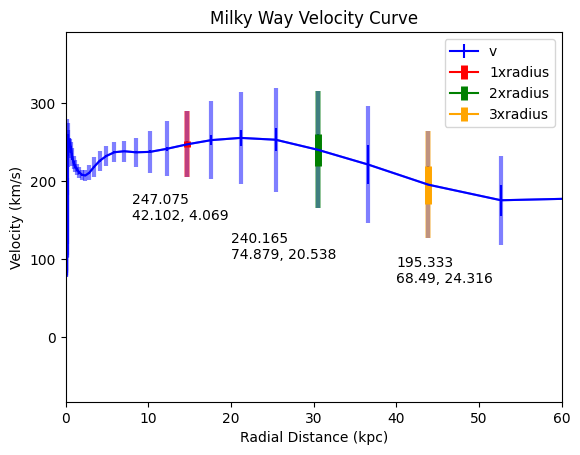

In [25]:
plt.errorbar(mw["R(kpc)"],mw["V(km/s)"],yerr=mw["err"],color="blue",label="v")
plt.errorbar(mw["R(kpc)"],mw["V(km/s)"],yerr=mw["dv"],color="blue",alpha = 0.5,elinewidth = 3)
plt.errorbar(r1_m,v1_m,e1_m,color="red",elinewidth=5,label='1xradius')
plt.errorbar(r2_m,v2_m,e2_m,color="green",elinewidth=5,label='2xradius')
plt.errorbar(r3_m,v3_m,e3_m,color="orange",elinewidth=5,label='3xradius')
plt.errorbar(r1_m,v1_m,dv1_m,color="red",elinewidth=4,alpha = 0.5)
plt.errorbar(r2_m,v2_m,dv2_m,color="green",elinewidth=4,alpha = 0.5)
plt.errorbar(r3_m,v3_m,dv3_m,color="orange",elinewidth=4,alpha = 0.5)
plt.xlim([0,60])
plt.annotate(str(v1_m)+'\n'+str(dv1_m)+', '+str(e1_m),[8,150])
plt.annotate(str(v2_m)+'\n'+str(dv2_m)+', '+str(e2_m),[20,100])
plt.annotate(str(v3_m)+'\n'+str(dv3_m)+', '+str(e3_m),[40,70])
plt.legend()
plt.title("Milky Way Velocity Curve")
plt.ylabel("Velocity (km/s)")
plt.xlabel("Radial Distance (kpc)")
plt.show()

##Figure 2##
This velocity curve looks a little diff and its a bit smaller than Andromeda, and the error bars are slightly less. I wonder how these are calculated compared to how theyre calculated in Andromeda, or if it's just a distance thing giving less uncertainty.

In [26]:
vratios(mw, mwsize/2, 1, dv=True)
print('-----------')
vratios(mw, mwsize/2, 1, dv=False)

We expect to see a ratio of 1.00 between 1 times the radius of the galaxy and 1 times the radius of the galaxy if Newtonian Gravity holds alone
We see a ratio of 1.00 for the same distance in data, with uncertainty of +/- 0.24
The 2 sigma limits for the data are [0.52,1.48] using the 'dv' standard deviation measure
The expected difference is within 2 sigma of the calculated difference using dv (standard deviation)
-----------
We expect to see a ratio of 1.00 between 1 times the radius of the galaxy and 1 times the radius of the galaxy if Newtonian Gravity holds alone
We see a ratio of 1.00 for the same distance in data, with uncertainty of +/- 0.24
The 2 sigma limits for the data are [0.95,1.05] using the 'err' standard error measure
The expected difference is within 2 sigma of the calculated difference using err (standard error)


In [27]:
vratios(mw, mwsize/2, 2, dv=True)
print('-----------')
vratios(mw, mwsize/2, 2, dv=False)

We expect to see a ratio of 0.71 between 2 times the radius of the galaxy and 1 times the radius of the galaxy if Newtonian Gravity holds alone
We see a ratio of 0.97 for the same distance in data, with uncertainty of +/- 0.35
The 2 sigma limits for the data are [0.28,1.66] using the 'dv' standard deviation measure
The expected difference is within 2 sigma of the calculated difference using dv (standard deviation)
-----------
We expect to see a ratio of 0.71 between 2 times the radius of the galaxy and 1 times the radius of the galaxy if Newtonian Gravity holds alone
We see a ratio of 0.97 for the same distance in data, with uncertainty of +/- 0.35
The 2 sigma limits for the data are [0.80,1.14] using the 'err' standard error measure
The expected difference is not within 2 sigma of the calculated difference (standard error)


In [28]:
vratios(mw, mwsize/2, 3, dv=True)
print('-----------')
vratios(mw, mwsize/2, 3, dv=False)

We expect to see a ratio of 0.58 between 3 times the radius of the galaxy and 1 times the radius of the galaxy if Newtonian Gravity holds alone
We see a ratio of 0.79 for the same distance in data, with uncertainty of +/- 0.31
The 2 sigma limits for the data are [0.17,1.41] using the 'dv' standard deviation measure
The expected difference is within 2 sigma of the calculated difference using dv (standard deviation)
-----------
We expect to see a ratio of 0.58 between 3 times the radius of the galaxy and 1 times the radius of the galaxy if Newtonian Gravity holds alone
We see a ratio of 0.79 for the same distance in data, with uncertainty of +/- 0.31
The 2 sigma limits for the data are [0.59,0.99] using the 'err' standard error measure
The expected difference is not within 2 sigma of the calculated difference (standard error)


Same deal as Andromeda, the error bars at 2 sigma are big enough to contain a 1/sqrt(r) drop off for the velocities, but for the smaller stderror, you can see that it's not consistent with a dark matter-less galaxy.

https://en.wikipedia.org/wiki/Milky_Way
    